In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol):    
    d = (a+c)/2.
    e = (b+c)/2.
    fd = f(d)
    fe = f(e)
    dx3 = (d-a)/3.
    Aac = dx3*(fa+4.*fd+fc)
    Acb = dx3*(fc+4.*fe+fb)
    if np.abs(Aab-(Aac+Acb))<=tol: 
        return (16./15.*(Aac+Acb)-Aab/15.)
    else:  
        F1 = adap_quad_comp(f,a,c,d,fa,fc,fd,Aac,tol)
        F2 = adap_quad_comp(f,c,b,e,fc,fb,fe,Acb,tol)
        return F1 + F2
    
def adap_quad(f,a,b,tol):
    c = (a+b)/2.
    fa = f(a)
    fb = f(b)
    fc = f(c)
    dx3 = (c-a)/3.
    Aab = dx3*(fa+4.*fc+fb)
    ival = adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol)    
    return ival

**Problem 1**: (5 pts) Use the adaptive quadrature algorithm to evaluate 

$$
\int_{-1}^{2} \frac{dt}{\sin\left(\sqrt{|t|} \right)}.
$$

State how you arrive at your result i.e. what tolerances do you choose and what degree of accuracy can you argue that they provide you?  Why do you not encounter divide-by-zero difficulties at $t=0$?

In [4]:
def func_p1(tt):
    return 1./(np.sin(np.sqrt(np.abs(tt))))

In [5]:
adap_quad(func_p1,-1,2,1e-13)

5.314115610288649

In [6]:
toli= .1
for jj in range(1,11):
    aval = adap_quad(func_p1,-1,2,toli)
    print("For tol=%1.2e we get the approx: %1.15f" % (toli,aval))
    toli *= .1

For tol=1.00e-01 we get the approx: 5.121680633317956
For tol=1.00e-02 we get the approx: 5.299258725823382
For tol=1.00e-03 we get the approx: 5.312255201204497
For tol=1.00e-04 we get the approx: 5.313956536152338
For tol=1.00e-05 we get the approx: 5.314102786177169
For tol=1.00e-06 we get the approx: 5.314113894050331
For tol=1.00e-07 we get the approx: 5.314115472548048
For tol=1.00e-08 we get the approx: 5.314115598222085
For tol=1.00e-09 we get the approx: 5.314115608654129
For tol=1.00e-10 we get the approx: 5.314115610156215


By the output above we can see that the tolerance changes the degrees of accuracy of the integral above. More specifically, if tol = 1e-n where n is an integer then the result is somewhat n digits accurate. For example: notice the result when tol = 1e-5 then the approx is 5 digits accurate. This is why I chose to use 1e-13 for my tol in the first computation, so I can get a result that is close to 13 digits accuracy. 

For the Adaptive Quadrature method we use:
$$
T_{[a,b]}(f) \approx A_{[a,b]}(f) + C_{0}(b-a)^{5}.
$$
where 
$$
A_{[a,b]}(f) = \frac{(b-a)}{6}\left(f(a) + 4f(c) + f(b)\right), ~ c = \frac{a+b}{2},
$$
If | $A_{[a,b]}(f)- A_{[a,c]}(f)-A_{[c,b]}(f)$| > tol
then we need to keep dividing and repeat the procedure. 
Now, the reason why t =0 is not a problem in this case, where in our original function f(0) is not defined. This is because, using the Adaptive Quadrature method we use the mid point of a and b and repeat the process. Whereas the midpoint of -1 and 2 is not 0 but once repeating the process can get closer and closer to zero but not exactly zero. In addition in this method we rely of simposon's method which takes the function and finds a quadratic function who has a very similar behavior such that the integral of the quadratic function and the original function over a certain inveral are somewhat similar.  


**Problem 2**: (5 pts) Write a recursive program which computes $\begin{pmatrix} n \\ k \end{pmatrix}$ where for $0\leq k \leq n$

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k!(n-k)!},
$$

using the formula 

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \begin{pmatrix} n-1 \\ k \end{pmatrix} + \begin{pmatrix} n-1 \\ k-1 \end{pmatrix}
$$

Provide two examples which show your implementation is correct.  

In [7]:
import math
def bnml_formula(n,k):
    if (k >= 0) & (n >=0) & (n >=k):
        return (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))
    else:
        return "invalid input"

In [8]:
def bnml_rec(n,k):
    if k==0: # Here we implement the stopping criteria which ends the recursion.  
        return 1
    if n==k:
        return 1
    else:
        return bnml_rec(n-1,k)+bnml_rec(n-1,k-1)

In [9]:
print(bnml_rec(2,1))
print(bnml_formula(2,1))

2
2.0


In [10]:
print(bnml_rec(4,3))
print(bnml_formula(4,3))

4
4.0


In [11]:
print(bnml_rec(8,3))
print(bnml_formula(8,3))

56
56.0


**Problem 3**: (10 pts) The Hermite polynomials $H_{n}(x)$ are such that $H_{0}(x)=1$, $H_{1}(x)=2x$, and for $n\geq2$, $H_{n}(x)$ satisfies the recurrence relationship

$$
H_{n}(x) = 2xH_{n-1}(x) -2(n-1)H_{n-2}(x), ~ n\geq 2. 
$$

* (6 pts) Write a recursive program to find any Hermite polynomial $H_{n}(x)$.
* (4 pts) Generate a plot of the first six Hermite polyonmials on the interval $-2\leq x \leq 2$.  Your figure should be labeled, have a legend, and different colors should be used to distinguish the different Hermite polynmials in the plot.  

In [18]:
def hermite_poly(n,x):
    if n==0:
        return 1.
    elif n==1:
        return 2.*x
    else:
        return 2.*x*hermite_poly(n-1,xvals) -2.*(n-1)*hermite_poly(n-2.,xvals)

(-2.0, 2)

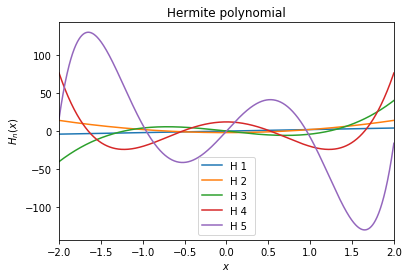

In [21]:
xvals = np.linspace(-2.,2.,int(1e3))
nvals = np.linspace(0,5,6)

for n in range(1,nvals.size):
    H0 = np.array(hermite_poly(nvals[n], xvals))
    plt.plot(xvals, H0, label = 'H %s ' % (n))

plt.xlabel('$x$')
plt.ylabel('$H_{n}(x)$')
plt.legend()
plt.title('Hermite polynomial')
plt.xlim(-2.,2)

**Problem 4** : (5 pts) Suppose that for two football teams, the probability, $P$, that team A will beat team B is given by 
$$
P = \frac{1+p}{2}\left(\frac{p}{1-p+p^{2}} \right)^{21}
$$
where $p$ is the probability that team A punts on a fourth down (ok, I really know nothing about football, but I think that kind of makes sense...)  Determine to within $10^{-3}$ the minimal value of $p$ that will ensure that team $A$ beats team $B$ at least half of the time.

In [22]:
def fun_football(p):
    f1 = (1+p)/2
    f2 = (p/(1-p+p**2))**21
    return f1*f2

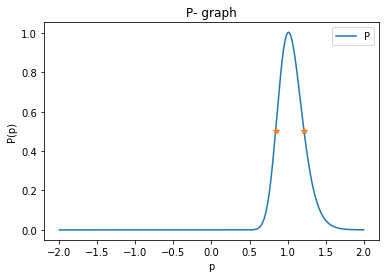

In [260]:
xvals = np.linspace(-2.,2.,int(1e3))
plt.plot(xvals, fun_football(xvals), label='P')
pn = 0.5*np.ones(2)
xstar = [0.8423423423423424, 1.216966966966967]
plt.plot(xstar,pn,'*')
plt.xlabel('p')
plt.ylabel('P(p)')
plt.title('P- graph')
plt.legend()
plt.show()

So, in order to solve this problem, we need to find the points of intersection between y =0.5 and our probability function.

In [261]:
def intersection(f, xvals,tol):
    for i in range(int(1e3-1)):
        if np.abs(f(xvals[i])-0.5) < tol:
            return xvals[i]

In [263]:
xvals1 =np.linspace(0.5,2,int(1e3))
pmin = (intersection(fun_football, xvals1, 1e-3))
xvals2 = np.linspace(0.85,1.5,int(1e3))
pmax = (intersection(fun_football, xvals2, 1e-3))
print('the minimal value of p that will ensure that team A beats team B at least half of the time', pmin)
print('and p should be less than ', pmax)

the minimal value of p that will ensure that team A beats team B at least half of the time 0.8423423423423424
and p should be less than  1.216966966966967


**Problem 5** : (10 pts) Using Newton's method, explain why the sequence 
$$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}>0,  
$$
converges to $\sqrt{A}$ (4 pts).  Hint, you need to think of a function whose root is $\sqrt{A}$.  Implement the method and characterize for various values of $x_{0}$ how quickly the method converges. (6 pts)

(5) Answer: First let's prove the sequence converges to $A^{0.5}$.
So, 
$$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}>0,  
$$
We know by the Newton's method that:

$$
x_{n} = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}, ~ n\geq 1
$$
Now, let $f(x) = (x- \sqrt{A})(x+\sqrt{A})$. Such that $\sqrt{A}$ is a root of f(x). 
Then, $f(x) = x^2 -A$ and $f'(x) = 2x$.
Lets plug this into Newton's method:

$$
x_{n} = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})} = x_{n-1} - \frac{(x_{n-1})^2 -A}{2 x_{n-1}} = \frac{x_{n-1}}{2} - \frac{A}{2 x_{n-1}}, ~ n\geq 1
$$
Which is exactly like our sequence at the top. Hence, the seq will converge to $\sqrt{A}$ because it is the root of f(x). 

Newtons method tells us the nearest root to the initial starting point $x_{0}$ which happens to be the root x=$\sqrt{A}$. This method uses the derivatie of f(x) to derive the slope at the guessed point, and then it finds the zero of that line. It then takes the y-value where the tangent line crosses the x-axis to create the next guess and repeat the process. So Newton's method will typically return the root that is closest to the initial guess. 

For example: lets try a different case: $x_{0} = 1$ $A = 2$ so $\sqrt{A} = \sqrt{2} = 1.414213562373095$
$$
x_{0} = 1\\
x_{1} = \frac{1}{2} \frac{(x_{0}^2 + A)}{x_{0}} = 1.5\\
x_{2} = \frac{1}{2} \frac{(x_{1}^2 + A)}{x_{1}} = 1.416666666666667\\
x_{3} = \frac{1}{2} \frac{(x_{2}^2 + A)}{x_{2}} = 1.4142156862\\
.\\
.\\
.\\
x_{n} = \frac{1}{2} \frac{(x_{n-1}^2 + A)}{x_{n-1}} =1.414213562373095\\
$$
Hence, already by $x_{3}$ we get the correct root to the degree of 6. So tol = 1e-6. 

In [25]:
def Newtons_method(f,fp,x0,tol):
    x1 = x0 -(f(x0)/fp(x0))
    xapproxs = np.array([x0,x1])
    while np.abs(x1-x0) >= tol:
        x0 = x1
        x1 = x0 -(f(x0)/fp(x0))
        xapproxs = np.append(xapproxs,x1)
    print("Root %1.15f" %x1)
    #rate_of_conv(xapproxs)
    return xapproxs

In [26]:
def rate_of_conv(capproxs):
    tterms = capproxs.size
    cstar = capproxs[tterms-1]
    cnp1 = np.log10(np.abs(capproxs[1:tterms-1]-cstar))
    cn = np.log10(np.abs(capproxs[0:tterms-2]-cstar))
    ftprms = np.polyfit(cn,cnp1,1)
    print("Intercept", 10**ftprms[1])
    print("slope value", ftprms[0])
    plt.scatter(cn, cnp1) 
    plt.plot(cn, ftprms[0]*cn +ftprms[1])
    plt.xlabel("$log_{10}|c_{n}-c{*}|$")
    plt.ylabel("$log_{10}|c_{n+1}-c_{*}|$")

Root 1.414213562373095
Intercept 0.421559705153928
slope value 2.023268515881072
Root 1.414213562373095
Intercept 0.41652767860830386
slope value 2.0165021687055744
Root 1.414213562373095
Intercept 0.2032538583697527
slope value 1.9310736356993436
Root 1.414213562373096
Intercept 0.11110522463744739
slope value 1.779902350371574


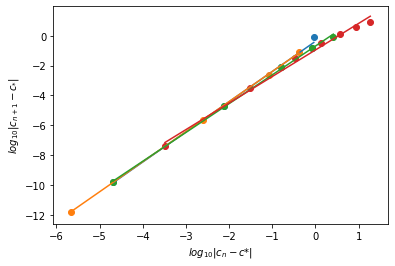

In [27]:
def f(x):
    return x**2 -2
def f_tag(x):
    return 2*x
rate_of_conv(Newtons_method(f,f_tag,0.5,1e-6))
rate_of_conv(Newtons_method(f,f_tag,1.,1e-6))
rate_of_conv(Newtons_method(f,f_tag,4.,1e-6))
rate_of_conv(Newtons_method(f,f_tag,20,1e-6))

As the starting point gets farther from $\sqrt{2}$ the slope which is the rate of convergance decreases. 

**Problem 6**: (5pts) In class for a root $x_{\ast}$ of $f(x)$, i.e. $f(x_{\ast})=0$, if $x_{0}$ is chosen "close" to $x_{\ast}$, then the sequence $\left\{x_{n}\right\}_{n=0}^{\infty}$  where 

$$
x_{n+1} = g\left(x_{n}\right), ~ g(x) = x - \frac{f(x)}{f'(x)}, ~ n\geq 0.
$$

should converge to $x_{\ast}$.  The question is how quickly.  So supposing that $f'(x_{\ast})\neq 0$ show 

* $g(x_{\ast}) = x_{\ast}$ (thus making $x_{\ast}$ a fixed point of $g(x)$)
* $g'(x_{\ast}) = 0$
* $x_{n+1} - x_{\ast} = \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})$

From this, infer that the rate of convergence (see the class notes for a definition of rate of convergence) for Newton's method is $\alpha = 2$.

(6) Answer: Let 

$$
x_{n+1} = g\left(x_{n}\right), ~ g(x) = x - \frac{f(x)}{f'(x)}, ~ n\geq 0. f(x_{\ast}) = 0, f'(x_{\ast}) \neq 0
$$
So, 
$$
g(x_{\ast}) = x_{\ast} - \frac{f(x_{\ast})}{f'(x_{\ast})} =x_{\ast} - \frac{0}{f'(x_{\ast})} = x_{\ast}\\
g'(x_{\ast}) = 1 - \frac{f'(x_{\ast})f'(x_{\ast}) - f(x_{\ast})f''(x_{\ast})}{f'(x_{\ast})f'(x_{\ast})} = 1- \frac{f'(x_{\ast})f'(x_{\ast}) - 0f''(x_{\ast})}{f'(x_{\ast})f'(x_{\ast})} = 1-1 = 0\\
$$

By Taylor series, 
$g(x_{n}) = g(x_{\ast}) -g'(x_{\ast})(x_{n} -x_{\ast}) + \frac{g''(x_{\ast})}{2}{(x_{n} -x_{\ast})}^{2} +\mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})$
Then, from here we know that, 
$x_{n+1} = x_{\ast} + \frac{g''(x_{\ast})}{2}{(x_{n} -x_{\ast})}^{2} +\mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})$
So, 
$x_{n+1} - x_{\ast} = \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3}) \approx \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} $
Let $x_{n} -x_{\ast} = e_{n}$. then $e_{n+1} = x_{n+1} -x_{\ast}$
Hence, 
$e_{n+1} = x_{n+1} -x_{\ast} \approx \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2}  = \frac{1}{2}g''(x_{\ast})\left(e_{n}\right)^{2} $
$$
\log{e_{n+1}} = \log{\frac{1}{2}g''(x_{\ast})\left(e_{n}\right)^{2}}\\
\log{e_{n+1}} = \log{\frac{1}{2}g''(x_{\ast})}+\log{\left(e_{n}\right)^{2}}\\
\log{e_{n+1}} = \log{\frac{1}{2}g''(x_{\ast})}+2\log{\left(e_{n}\right)}
$$

In conclusion, each successive error term is proportional to the square of the previor error, this means that Newton's method is quadratically convergent.

**Problem 7**: (10 pts) In many cases, getting convergence rates via pen and paper is tricky.  However, we can often readily find them via numerical simulation.  

a.) (4 pts) For 
$$
f(x) = x\cos(x) - \sin^{2}(x), 
$$
find all the roots on the interval $[0,5]$ using Newton's method with a tolerance of $10^{-6}$.


b.) (6 pts) For each root, establish that the rate of convergence is quadratic.  Note, to do this, you will need to save the various points generated by Newton's method in an array.  You will need to find the fixed point.  Then, you should note that if 
$$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$  
then for $n$ large
$$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$
So, then you should be thinking about the slope of a line in a log/log plot.  

Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point.  Does your rate change based on your initial guess?  Again, please elaborate and show plots to make your case.

First root found [0.]
Second root found [0.84644635]
Third root found [4.90953439]


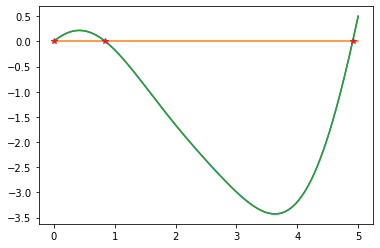

In [264]:
from scipy import optimize
def fun_p7(x):
    return x*np.cos(x)- (np.sin(x))**2

xvals = np.linspace(0,5., int(1e3))
plt.plot(xvals,fun_p7(xvals))
lin = np.zeros(int(1e3))
plt.plot(xvals, lin)
root1 = optimize.root(fun_p7, -0)
print("First root found %s" % root1.x)
root2 = optimize.root(fun_p7, 2)
print("Second root found %s" % root2.x)
root3 = optimize.root(fun_p7, 5)
print("Third root found %s" % root3.x)

xroots = np.array([root1.x, root2.x, root3.x])
yroots = np.zeros(len(xroots))
plt.plot(xvals,fun_p7(xvals))
plt.plot(xroots,yroots,'*')

In [265]:
f = lambda x: x*np.cos(x)- (np.sin(x))**2
fp = lambda x: np.cos(x) -x*np.sin(x) -2*(np.sin(x)*np.cos(x))

def Newtons_method(f,fp,x0,tol):
    x1 = x0 -(f(x0)/fp(x0))
    xapproxf = np.array([x0,x1])
    while np.abs(x1-x0) >= tol:
        x0 = x1
        x1 = x0 -(f(x0)/fp(x0))
        xapproxf = np.append(xapproxf,x1)
    print("your root is", x1)


In [266]:
Newtons_method(f,fp,0.1,1e-6)
Newtons_method(f,fp,1,1e-6)
Newtons_method(f,fp,5,1e-6)

your root is -1.1533205639072678e-15
your root is 0.8464463548574079
your root is 4.909534391393232


In [267]:
def rate_of_conv(capprox):
    tterms = capprox.size
    cstar = capprox[tterms-1]
    cnp1 = np.log10(np.abs(capprox[1:tterms-1]-cstar))
    cn = np.log10(np.abs(capprox[0:tterms-2]-cstar))
    ftprms = np.polyfit(cn, cnp1, 1)
    print("Intercept value: %1.15f" %10.**(ftprms[1]))
    print("Solpe value: %1.15f" %ftprms[0])
    
    plt.scatter(cn, cnp1)
    plt.plot(cn,(ftprms[0]*cn+ftprms[1]))
    plt.xlabel("$log|C_{n}-C_{*}|$")
    plt.ylabel("$log|C_{n+1}-C{*}|$")
    plt.title("rate of convergence graph")

In [268]:
def Newtons_method(f,fp,x0,tol):
    x1 = x0-f(x0)/fp(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0)>=tol:
        x0 = x1
        x1 = x0-f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    print("Your root is: %1.15f" %x1)
    return rate_of_conv(xapprox)

Your root is: -0.000000000000000
Intercept value: 1.373966708484134
Solpe value: 2.039900061915640


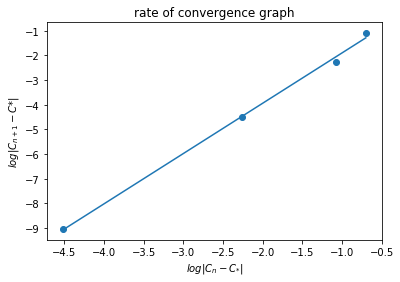

In [269]:
Newtons_method(f,fp,0.2,1e-6)

Your root is: 0.846446354857408
Intercept value: 0.628136485072579
Solpe value: 1.946743750885200


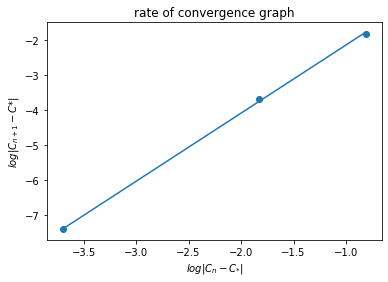

In [270]:
Newtons_method(f,fp,1,1e-6)

Your root is: 4.909534391393232
Intercept value: 0.188924218963439
Solpe value: 1.947993686024322


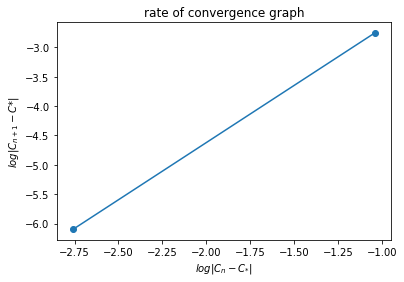

In [271]:
Newtons_method(f,fp,5,1e-6)

In conclusion, in all three cases, we can see that $\alpha \approx 2$ since our results were : 2.039900061915640, 1.946743750885200,  1.947993686024322. This proves that Newton's method is quadratically convergent. This is because in our case $\alpha$ is the slope of: 
$$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$  
then for $n$ large
$$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$

One more point that is important to mention: The rate of convergence is dependent on the initial point $x_{0}$ this is becuase if $x_{0}$ is very close to the root we will find the root faster, and vice versa (when $x_{0}$ is far from the root of f(x). An example is below: where the root is 4.909534391393061 but we try to find it using Newton's method with two different starting points: $x_{0}= 4.1$ and $x_{0}=4.9$. Then when $x_{0}= 4.1 \rightarrow \alpha = 2.068920707989059$ and when $x_{0}=4.9 \rightarrow \alpha =2.003428670393791$. Hence, $\alpha$ is dependent on the starting point ($x_{0}$) which will determine f'($x_{0}$) and f($x_{0}$), because this method uses the derivatie of f(x) to derive the slope at the guessed point, and then it finds the zero of that line. It then takes the y-value where the tangent line crosses the x-axis to create the next guess and repeat the process. 

Your root is: 4.909534391393061
Intercept value: 0.273570050413307
Solpe value: 2.003428670393791


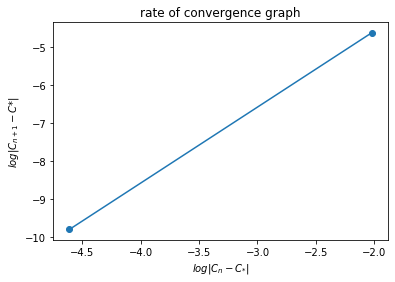

In [272]:
Newtons_method(f,fp,4.9,1e-6)

Your root is: 4.909534391393061
Intercept value: 0.476273841659373
Solpe value: 2.068920707989059


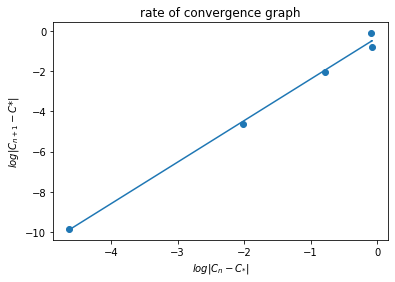

In [273]:
Newtons_method(f,fp,4.1,1e-6)